<a href="https://colab.research.google.com/github/Mrinal-Official/Hotel-Booking-Analysis/blob/main/EDA_on_Hotel_Booking_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -**  Mrinal Kanti Paul
##### **Team Member 2 -**  Bishwajit Paul


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/Mrinal-Official/Hotel-Booking-Analysis/main/Hotel%20Bookings.csv')

### Dataset First View

In [3]:
# To show all columns of the dataset
pd.set_option('display.max_columns',None)

In [4]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
x,y = df.shape
print(f'Number of rows : {x}')
print(f'Number of columns : {y}')

Number of rows : 119390
Number of columns : 32


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

31994

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
missing_values = df.isna().sum().sort_values(ascending = False).head(5)
missing_values

,0
company,112593
agent,16340
country,488
children,4
reserved_room_type,0


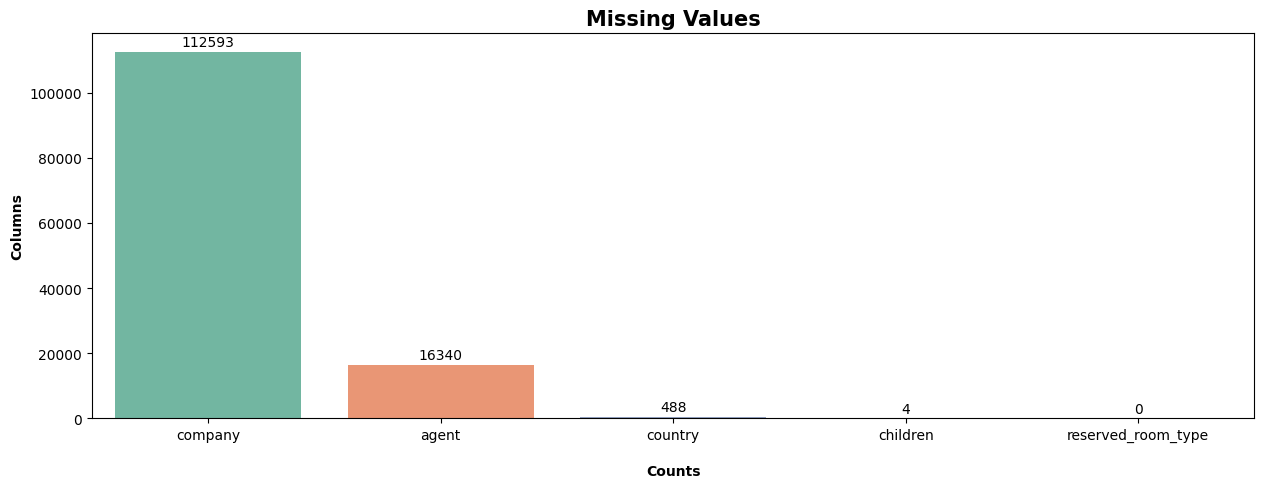

In [9]:
# Visualizing the missing values
plt.figure(figsize = (15,5))
sns.barplot(missing_values, palette = 'Set2')
for i, containers in enumerate(plt.gca().containers):
  plt.bar_label(containers, label_type = 'edge', padding = 2)
plt.title('Missing Values',fontweight = 'bold', fontsize = 15)
plt.xlabel('\nCounts', fontweight = 'bold')
plt.ylabel('Columns', fontweight = 'bold')
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for col in df.columns:
  print(f"{col.title()} :\n {df[col].unique()}\n")

Hotel :
 ['Resort Hotel' 'City Hotel']

Is_Canceled :
 [0 1]

Lead_Time :
 [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

In [14]:
# 1
df.drop_duplicates(inplace = True)

In [15]:
# 2
df['agent'].fillna(-1, inplace = True)
df['country'].fillna('Others', inplace = True)
df['company'].fillna(-1, inplace = True)
df['children'].fillna(df['children'].mean(), inplace = True)

In [16]:
# 3
df['children'] = df['children'].astype(int)

df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_guests'] = df['adults'] + df['babies'] + df['children']


### What all manipulations have you done and insights you found?

1 - Drop all the duplicate values from our dataset.

2 - Filled nan values in agent and company with -1.

3- Filled nan values in company with Others.

4- Filled nan values in children with its mean.

5- Change the data type of children column to int.

6- Added a new column 'total_nights' by adding 'stays_in_weekend_nights' and 'stays_in_week_nights' columns.

7- Added a new column 'total_guests' by adding 'adults', 'babies' and 'children' columns

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

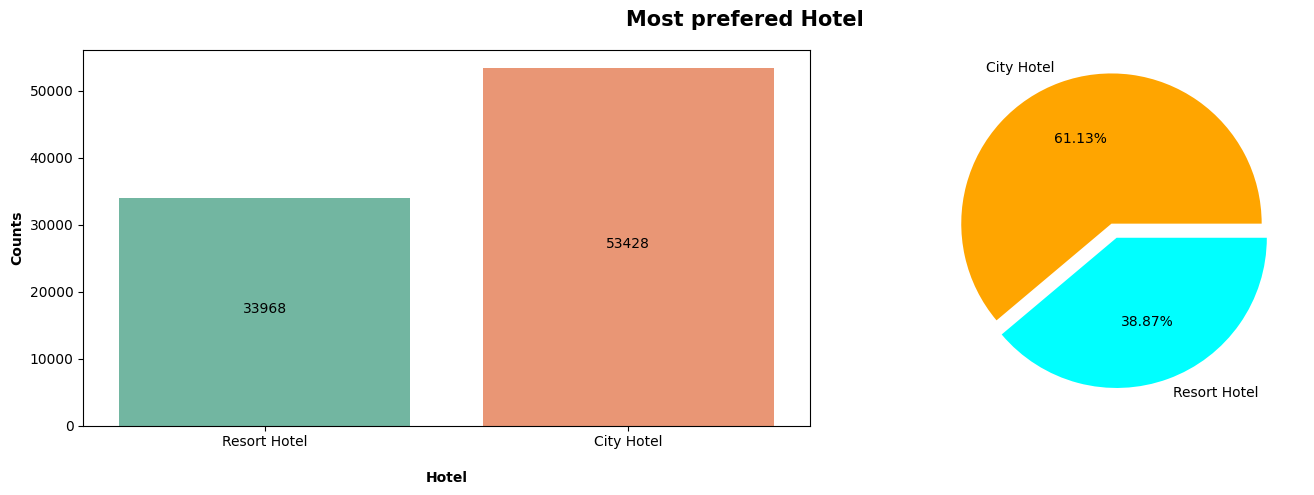

In [17]:
# Chart - 1 visualization code
plt.figure(figsize = (15,5))

# Count plot
plt.subplot(1,2,1)
sns.countplot(x = df['hotel'], palette = 'Set2')
# plt.title('Hotel Types', fontweight = 'bold', fontsize = 15)
plt.xlabel('\nHotel', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
for i, containers in enumerate(plt.gca().containers):
  plt.bar_label(containers, label_type = 'center', padding = 2)

# Pie plot
plt.subplot(1,2,2)
plt.pie(df['hotel'].value_counts(), labels = df['hotel'].value_counts().index, autopct = '%.2f%%', explode = [0.1,0], colors = ['#FFA500','#00FFFF'])
# plt.title('Hotel Types', fontweight = 'bold', fontsize = 15)
# plt.legend()

# Adding a title
plt.suptitle('Most prefered Hotel', fontweight = 'bold', fontsize = 15)


plt.tight_layout()

# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

Used count plot to show the total count of different plot and pie plot to show the the percentage they shape in the entire dataset.

##### 2. What is/are the insight(s) found from the chart?

The count plot shows people prefer City Hotel more than Resort Hotel and pie plot shows City Hotel is 61.13% of the whole dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 2

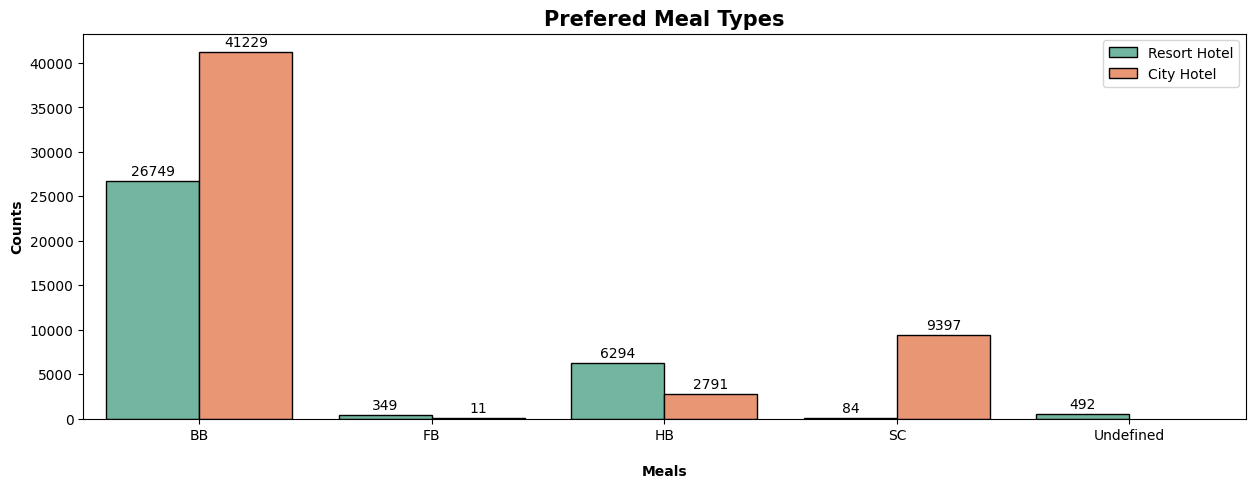

In [18]:
# Chart - 2 visualization code
plt.figure(figsize=(15,5))
sns.countplot(x = df['meal'], hue = df['hotel'], palette='Set2', edgecolor = 'black')
for i, containers in enumerate(plt.gca().containers):
  plt.bar_label(containers, padding = 2)
plt.title('Prefered Meal Types', fontweight = 'bold', fontsize = 15)
plt.xlabel('\nMeals', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I choose count plot to show the counts of different meals prefered in different hotel types.

##### 2. What is/are the insight(s) found from the chart?

We can see that BB meal type is prefered most than any other meals and is also prefered most in City Hotel rather than.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

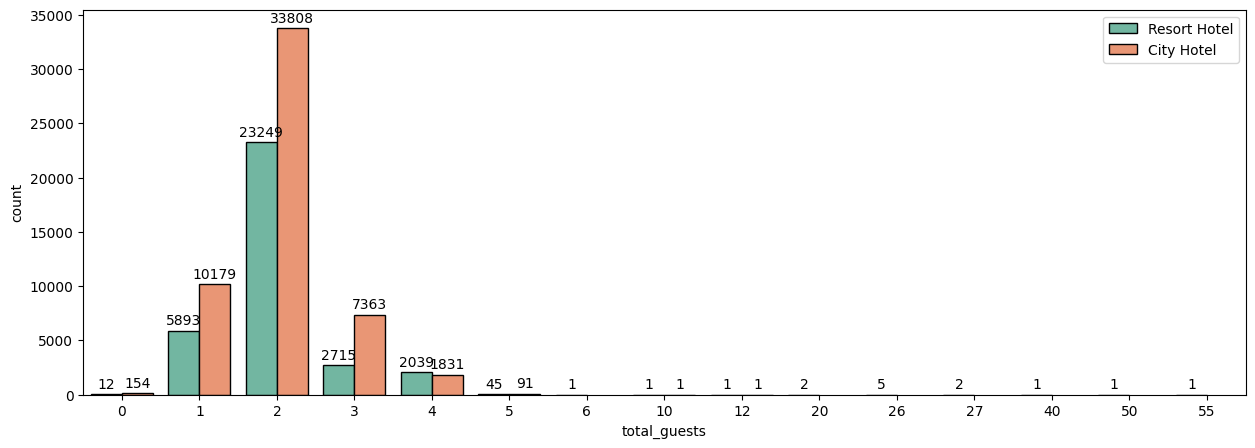

In [20]:
# Chart - 3 visualization code
plt.figure(figsize= (15,5))
sns.countplot(x = df['total_guests'], hue = df['hotel'], edgecolor = 'black', palette = 'Set2')
for i, containers in enumerate(plt.gca().containers):
  plt.bar_label(containers, padding = 2)
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

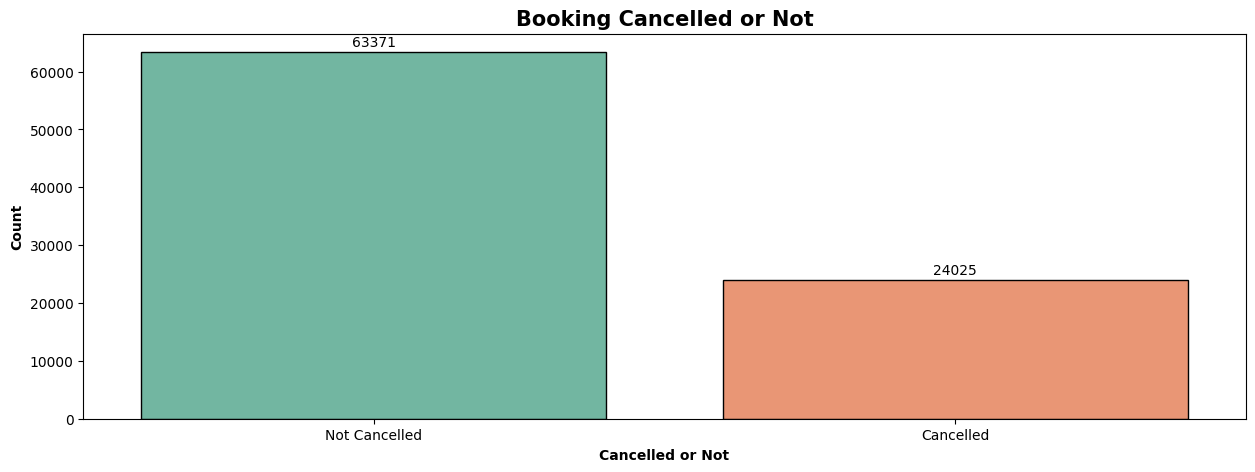

In [31]:
# Chart - 4 visualization code
plt.figure(figsize = (15,5))
sns.countplot(x = df['is_canceled'], palette='Set2', edgecolor = 'black', )
for i, containers in enumerate(plt.gca().containers):
  plt.bar_label(containers, padding = 2)
plt.xticks([0,1], labels = ['Not Cancelled', 'Cancelled'])
plt.xlabel('Cancelled or Not', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.title('Booking Cancelled or Not', fontweight = 'bold', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [32]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,-1.0,-1.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,-1.0,-1.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,-1.0,-1.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,-1.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,-1.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,-1.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,-1.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,-1.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,-1.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2


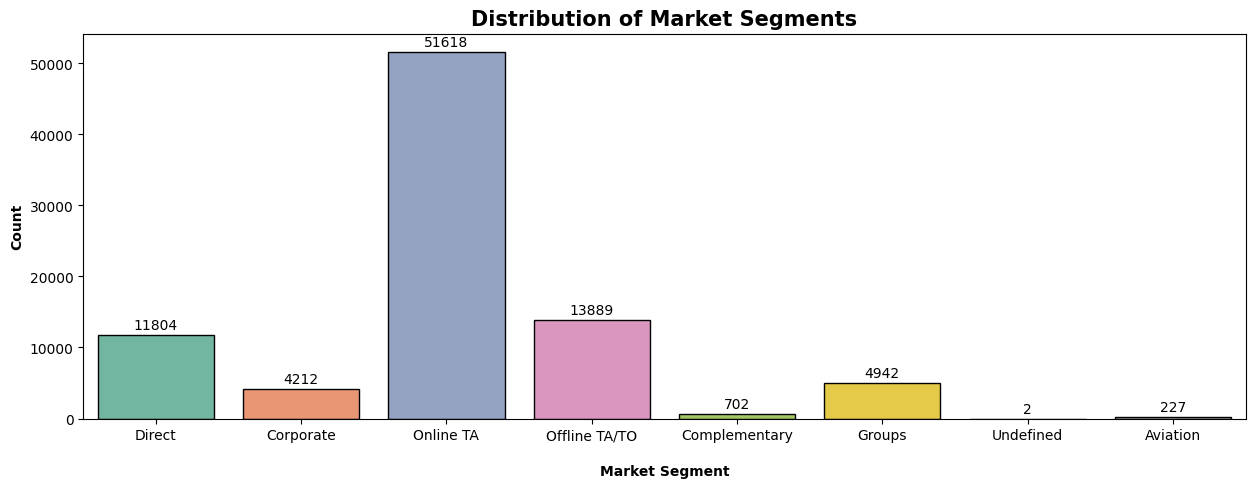

In [35]:
# Chart - 5 visualization code
plt.figure(figsize = (15,5))
sns.countplot(x = df['market_segment'], edgecolor = 'black', palette='Set2')
for i, containers in enumerate(plt.gca().containers):
  plt.bar_label(containers, padding = 2)
plt.xlabel('\nMarket Segment', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.title('Distribution of Market Segments', fontweight = 'bold', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

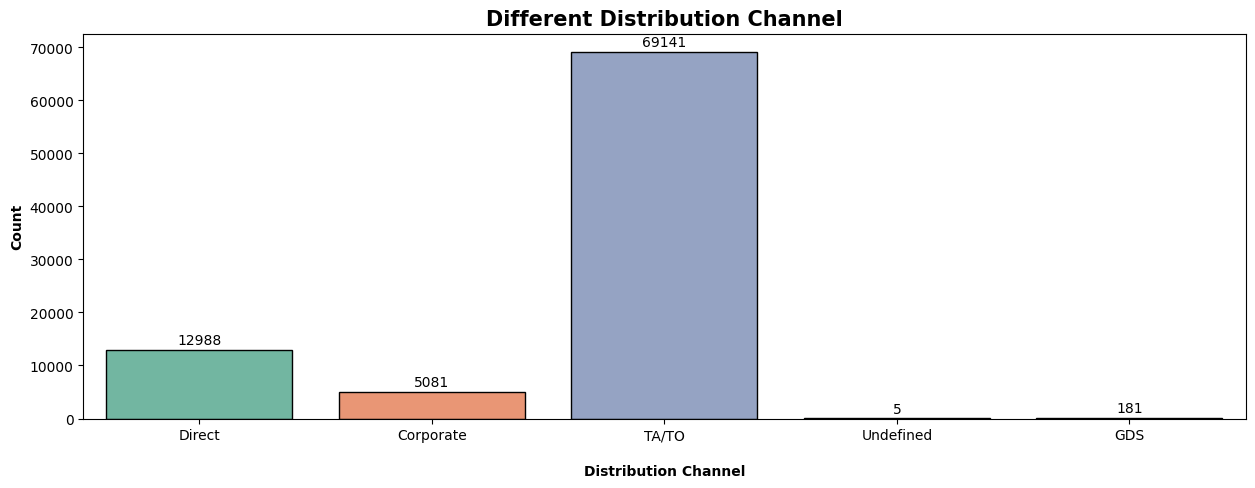

In [37]:
# Chart - 6 visualization code
plt.figure(figsize=(15,5))
sns.countplot(x = df['distribution_channel'], edgecolor = 'black', palette='Set2')
for i, containers in enumerate(plt.gca().containers):
  plt.bar_label(containers, padding = 2)
plt.xlabel('\nDistribution Channel', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.title('Different Distribution Channel', fontweight = 'bold', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [38]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,-1.0,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,-1.0,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,-1.0,-1.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,-1.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,-1.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


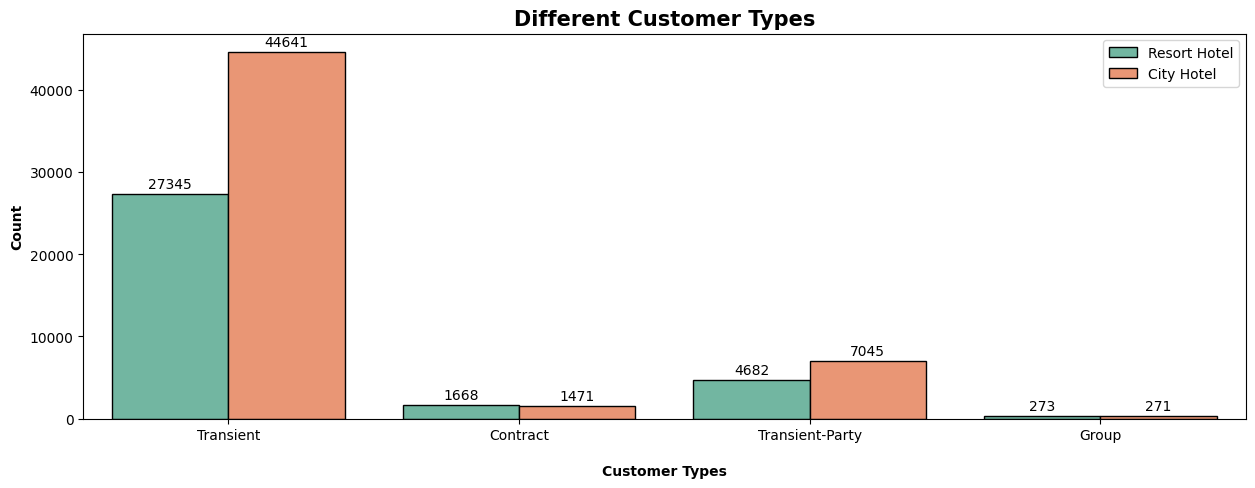

In [42]:
# Chart - 7 visualization code
plt.figure(figsize = (15,5))
sns.countplot(x = df['customer_type'], palette='Set2', edgecolor = 'black', hue=df['hotel'])
for i, containers in enumerate(plt.gca().containers):
  plt.bar_label(containers, padding = 2)
plt.xlabel('\nCustomer Types', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.title('Different Customer Types', fontweight = 'bold', fontsize = 15)
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [59]:
x = df['agent'].value_counts().sort_values(ascending = False).head(10)
x

,count
agent,
9.0,28759
240.0,13028
-1.0,12193
14.0,3349
7.0,3300
250.0,2779
241.0,1644
28.0,1502
8.0,1383


In [74]:
# Chart - 8 visualization code
x = df['agent'].value_counts().sort_values(ascending = False).head(10)
plt.figure(figsize = (15,5))
plt.barh(x = x.values, y = x.index)
for i, containers in enumerate(plt.gca().containers):
  plt.bar_label(containers, padding = 2)
plt.show()

TypeError: barh() missing 1 required positional argument: 'width'

<Figure size 1500x500 with 0 Axes>

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***